In [1]:
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plot_settings = {
    'legend.fontsize': 15,
    'figure.figsize': (15, 5),
    'axes.labelsize': 18,
    'axes.titlesize': 20,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15
}

%matplotlib inline

• Без tensorboard, так как не удалось добиться стабильной работы на одной из моих машин

In [2]:
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')
x_train, x_test = df_train.iloc[:, 1:], df_test.iloc[:, 1:]
y_train, y_test = df_train.iloc[:, 0].values, df_test.iloc[:, 0].values
x_train /= 255
x_test /= 255
x_train, x_test = x_train.values, x_test.values

# 1. Logistic Regression

In [3]:
# model_1 = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(10, activation = 'softmax')
# ])

# model_1.compile(
#     optimizer = 'sgd',
#     loss = 'sparse_categorical_crossentropy',
#     metrics = ['accuracy']
# )

# history_1 = model_1.fit(x_train, y_train, epochs = 100, verbose = 0, validation_data = (x_test, y_test))

# pickle.dump(history_1.history, open('model_1_history.pickle', 'wb'))
# model_1.save('model_1.h5')

In [4]:
model_1 = tf.keras.models.load_model('model_1.h5')
history_1 = tf.keras.callbacks.History()
history_1.history = pickle.load(open('model_1_history.pickle', 'rb'))

In [5]:
loss_1, accuracy_1 = model_1.evaluate(x_test, y_test, verbose = 0)
va_1 = history_1.history['val_accuracy']
print('final loss = {}\nfinal accuracy = {:.3f}'.format(loss_1, accuracy_1))
print('best validation accuracy of {:.3f} observed at epoch #{}'.format(max(va_1), va_1.index(max(va_1))))

final loss = 0.41624795937538145
final accuracy = 0.857
best validation accuracy of 0.860 observed at epoch #62


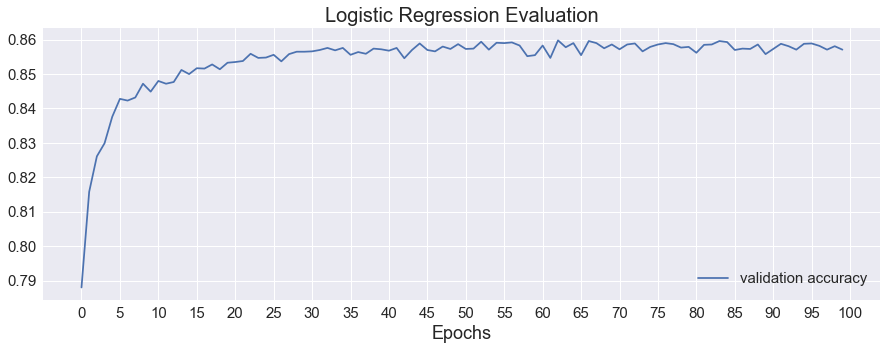

In [6]:
plt.rcParams.update(plot_settings)
plt.title('Logistic Regression Evaluation')
plt.xlabel('Epochs')
plt.plot(va_1, label = 'validation accuracy')
plt.legend(loc = 4)
plt.xticks(np.arange(0, 101, 5))
plt.show()

# 2. Fully Connected NN

In [7]:
# model_2 = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(512, activation = 'relu', input_shape = (784, )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(512, activation = 'relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(10, activation = 'softmax')
# ])

# model_2.compile(
#     optimizer = 'sgd',
#     loss = 'sparse_categorical_crossentropy',
#     metrics = ['accuracy']
# )

# history_2 = model_2.fit(x_train, y_train, epochs = 100, verbose = 0, validation_data = (x_test, y_test))

# pickle.dump(history_2.history, open('model_2_history.pickle', 'wb'))
# model_2.save('model_2.h5')

In [8]:
model_2 = tf.keras.models.load_model('model_2.h5')
history_2 = tf.keras.callbacks.History()
history_2.history = pickle.load(open('model_2_history.pickle', 'rb'))

In [9]:
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test, verbose = 0)
va_2 = history_2.history['val_accuracy']
print('final loss = {}\nfinal accuracy = {:.3f}'.format(loss_2, accuracy_2))
print('best validation accuracy of {:.3f} observed at epoch #{}'.format(max(va_2), va_2.index(max(va_2))))

final loss = 0.29486902883648874
final accuracy = 0.907
best validation accuracy of 0.910 observed at epoch #94


Точность полносвязной сети со скрытыми слоями на 5 п.п. выше логистической регрессии<br>
Дополнительные полносвязные слои позволяют лучше обучиться на входных данных,<br>
так как каждый слой содержит в себе дополнительную decision boundary

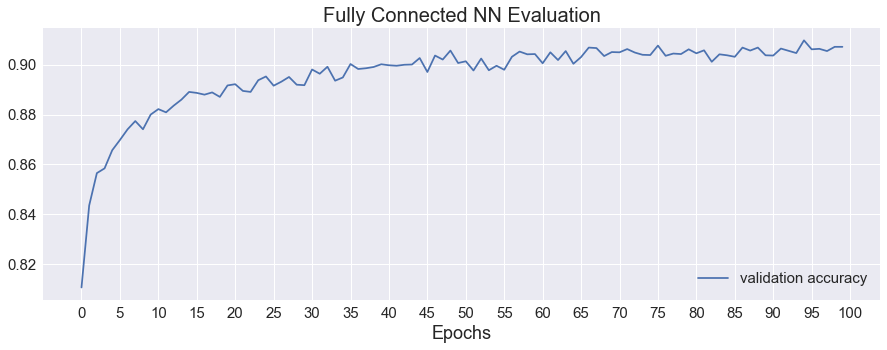

In [10]:
plt.rcParams.update(plot_settings)
plt.title('Fully Connected NN Evaluation')
plt.xlabel('Epochs')
plt.plot(va_2, label = 'validation accuracy')
plt.legend(loc = 4)
plt.xticks(np.arange(0, 101, 5))
plt.show()

# 3. Convolutional NN

In [11]:
# x_train = x_train.reshape(60000, 28, 28, 1)
# x_test = x_test.reshape(10000, 28, 28, 1)

# model_3 = tf.keras.models.Sequential([
#     tf.keras.layers.Convolution2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Convolution2D(64, (3, 3), activation = 'relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation = 'relu'),
#     tf.keras.layers.Dense(10, activation = 'softmax')
# ])

# model_3.compile(
#     optimizer = 'sgd',
#     loss = 'sparse_categorical_crossentropy',
#     metrics = ['accuracy']
# )

# history_3 = model_3.fit(x_train, y_train, epochs = 100, verbose = 0, validation_data = (x_test, y_test))

# pickle.dump(history_3.history, open('model_3_history.pickle', 'wb'))
# model_3.save('model_3.h5')

In [12]:
model_3 = tf.keras.models.load_model('model_3.h5')
history_3 = tf.keras.callbacks.History()
history_3.history = pickle.load(open('model_3_history.pickle', 'rb'))

In [13]:
x_test = x_test.reshape(10000, 28, 28, 1)
loss_3, accuracy_3 = model_3.evaluate(x_test, y_test, verbose = 0)
va_3 = history_3.history['val_accuracy']
print('final loss = {}\nfinal accuracy = {:.3f}'.format(loss_3, accuracy_3))
print('best validation accuracy of {:.3f} observed at epoch #{}'.format(max(va_3), va_3.index(max(va_3))))

final loss = 0.3553665446355939
final accuracy = 0.913
best validation accuracy of 0.915 observed at epoch #58


Свёрточная сеть показывает точность на 60 б.п. выше полносвязной NN<br>

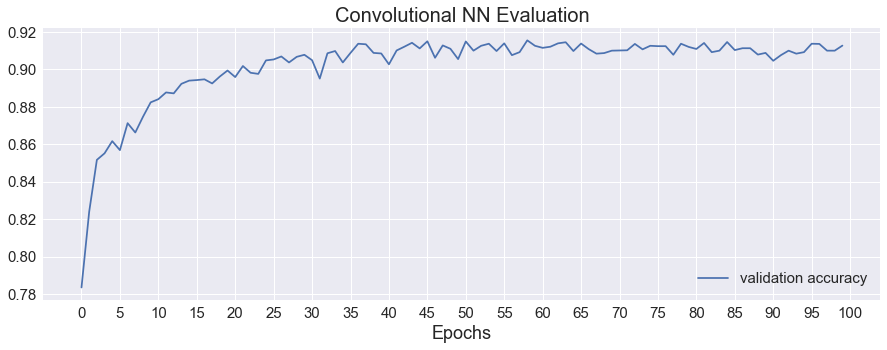

In [14]:
plt.rcParams.update(plot_settings)
plt.title('Convolutional NN Evaluation')
plt.xlabel('Epochs')
plt.plot(va_3, label = 'validation accuracy')
plt.legend(loc = 4)
plt.xticks(np.arange(0, 101, 5))
plt.show()

# 4. Convolutional NN, more Conv2D layers

In [15]:
# x_train = x_train.reshape(60000, 28, 28, 1)
# x_test = x_test.reshape(10000, 28, 28, 1)

# model_4 = tf.keras.models.Sequential([
#     tf.keras.layers.Convolution2D(32, (2, 2), activation = 'relu', input_shape = (28, 28, 1)),
#     tf.keras.layers.Convolution2D(32, (2, 2), activation = 'relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Convolution2D(64, (3, 3), activation = 'relu'),
#     tf.keras.layers.Convolution2D(64, (2, 2), activation = 'relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation = 'relu'),
#     tf.keras.layers.Dense(10, activation = 'softmax')
# ])

# model_4.compile(
#     optimizer = 'sgd',
#     loss = 'sparse_categorical_crossentropy',
#     metrics = ['accuracy']
# )

# history_4 = model_4.fit(x_train, y_train, epochs = 100, verbose = 0, validation_data = (x_test, y_test))

# pickle.dump(history_4.history, open('model_4_history.pickle', 'wb'))
# model_4.save('model_4.h5')

In [16]:
model_4 = tf.keras.models.load_model('model_4.h5')
history_4 = tf.keras.callbacks.History()
history_4.history = pickle.load(open('model_4_history.pickle', 'rb'))

In [17]:
x_test = x_test.reshape(10000, 28, 28, 1)
loss_4, accuracy_4 = model_4.evaluate(x_test, y_test, verbose = 0)
va_4 = history_4.history['val_accuracy']
print('final loss = {}\nfinal accuracy = {:.3f}'.format(loss_4, accuracy_4))
print('best validation accuracy of {:.3f} observed at epoch #{}'.format(max(va_4), va_4.index(max(va_4))))

final loss = 0.7696436336139916
final accuracy = 0.909
best validation accuracy of 0.912 observed at epoch #38


Дополнительные свёрточные слои в данном случае не дали положительного результата,<br>
итоговая точно оказалась даже незначительно хуже (на 30 б.п.)

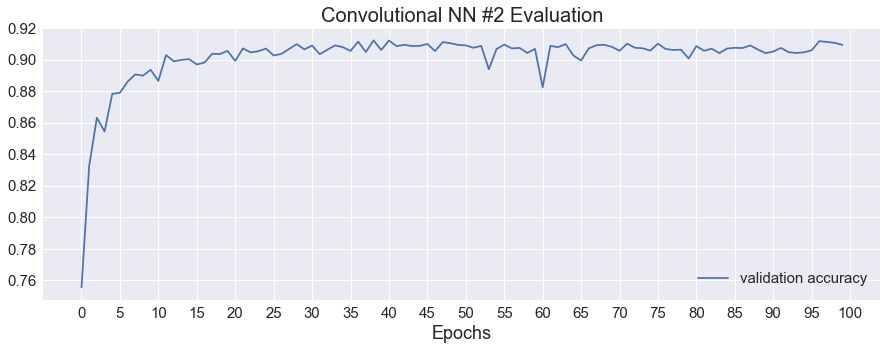

In [18]:
plt.rcParams.update(plot_settings)
plt.title('Convolutional NN #2 Evaluation')
plt.xlabel('Epochs')
plt.plot(va_4, label = 'validation accuracy')
plt.legend(loc = 4)
plt.xticks(np.arange(0, 101, 5))
plt.show()

# 5. Convolutional NN, final version

In [19]:
# x_train = x_train.reshape(60000, 28, 28, 1)
# x_test = x_test.reshape(10000, 28, 28, 1)

# model_5 = tf.keras.models.Sequential([
#     tf.keras.layers.Convolution2D(32, (2, 2), activation = 'relu', input_shape = (28, 28, 1)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Convolution2D(32, (2, 2), activation = 'relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Convolution2D(64, (3, 3), activation = 'relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Convolution2D(64, (2, 2), activation = 'relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation = 'relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(10, activation = 'softmax')
# ])

# model_5.compile(
#     optimizer = 'sgd',
#     loss = 'sparse_categorical_crossentropy',
#     metrics = ['accuracy']
# )

# history_5 = model_5.fit(x_train, y_train, epochs = 100, verbose = 0, validation_data = (x_test, y_test))

# pickle.dump(history_5.history, open('model_5_history.pickle', 'wb'))
# model_5.save('model_5.h5')

In [20]:
model_5 = tf.keras.models.load_model('model_5.h5')
history_5 = tf.keras.callbacks.History()
history_5.history = pickle.load(open('model_5_history.pickle', 'rb'))

In [21]:
x_test = x_test.reshape(10000, 28, 28, 1)
loss_5, accuracy_5 = model_5.evaluate(x_test, y_test, verbose = 0)
va_5 = history_5.history['val_accuracy']
print('final loss = {}\nfinal accuracy = {:.3f}'.format(loss_5, accuracy_5))
print('best validation accuracy of {:.3f} observed at epoch #{}'.format(max(va_5), va_5.index(max(va_5))))

final loss = 0.44764369339450494
final accuracy = 0.922
best validation accuracy of 0.925 observed at epoch #48


Добавление слоёв нормализации вывело модель на лучший показатель точности из всех итераций

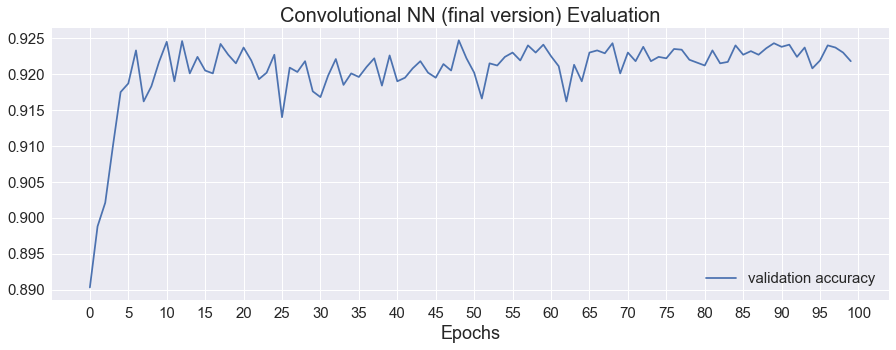

In [22]:
plt.rcParams.update(plot_settings)
plt.title('Convolutional NN (final version) Evaluation')
plt.xlabel('Epochs')
plt.plot(va_5, label = 'validation accuracy')
plt.legend(loc = 4)
plt.xticks(np.arange(0, 101, 5))
plt.show()